In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv(r"\Users\sujal\Downloads\Telco-Customer-Churn.csv")

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7028,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7029,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7030,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [7]:
df.isnull()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7028,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7029,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7030,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
plot_color=['brown','darkgreen']

C:\Users\sujal\AppData\Local\Temp\ipykernel_9120\2430286967.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='Churn',palette=plot_color)


<Axes: xlabel='Churn', ylabel='count'>

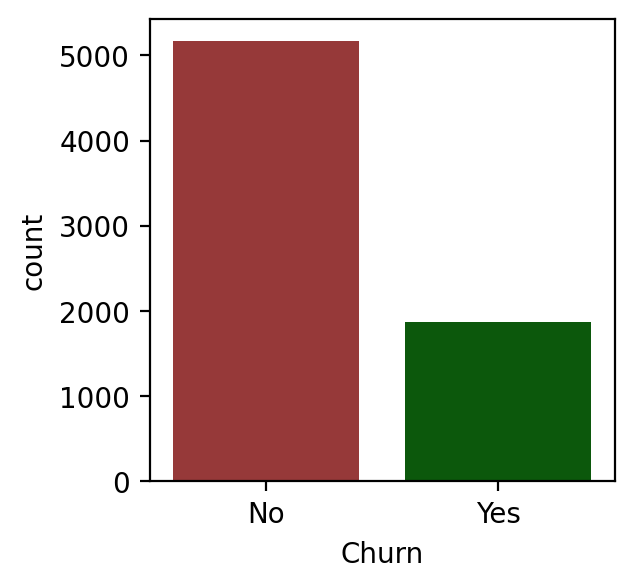

In [10]:
plt.figure(figsize=(3,3),dpi=200)
sns.countplot(data=df,x='Churn',palette=plot_color)

In [11]:
#help(sns.countplot())

<Axes: xlabel='Churn', ylabel='TotalCharges'>

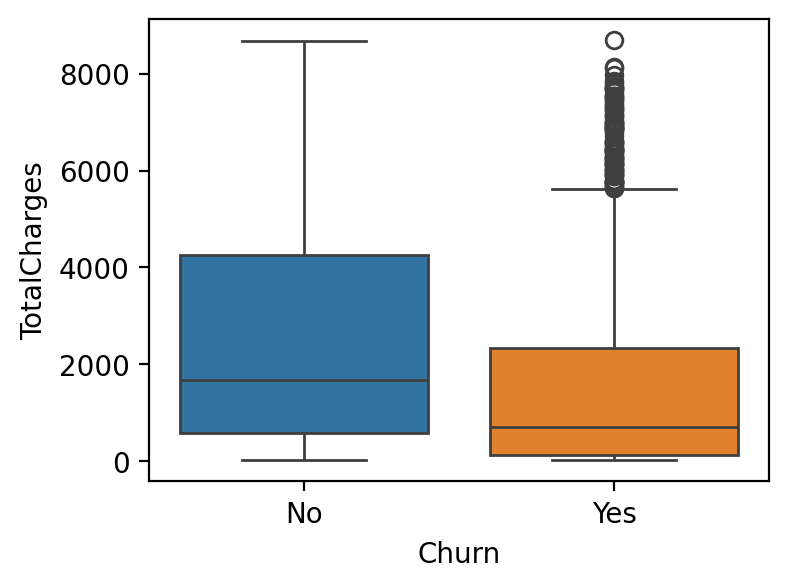

In [12]:
plt.figure(figsize=(4,3),dpi=200)
sns.boxplot(data=df,y='TotalCharges',x='Churn',hue='Churn')

In [13]:
#help(sns.boxplot())

<Axes: xlabel='Contract', ylabel='TotalCharges'>

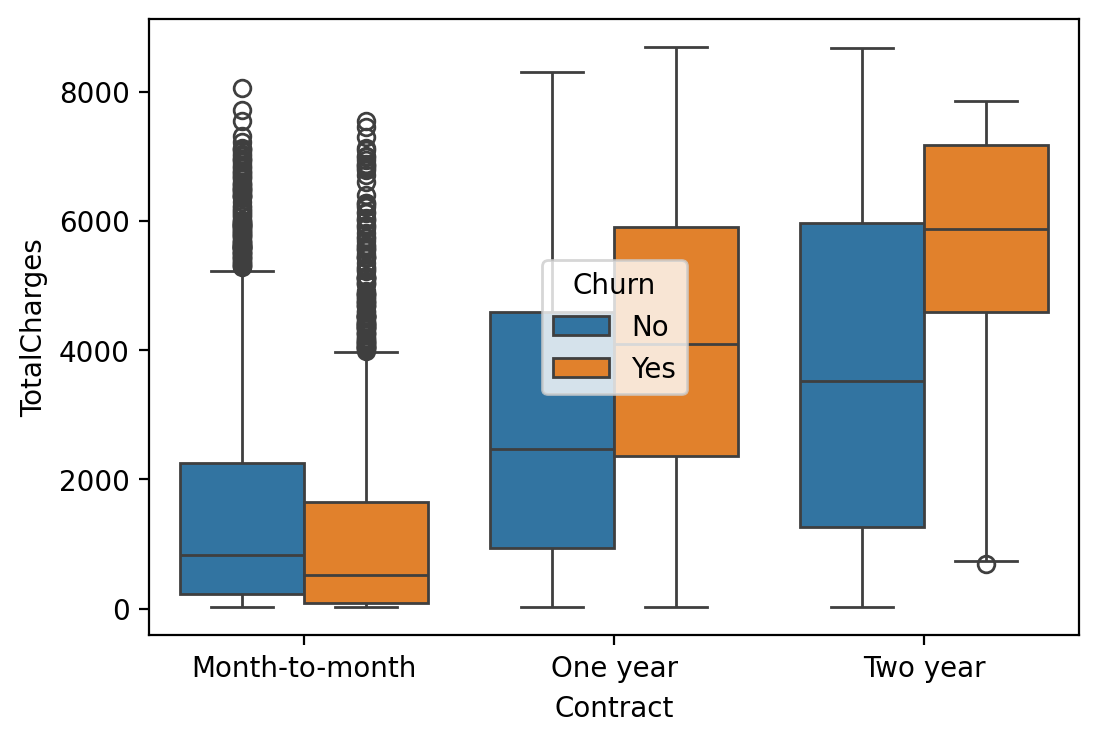

In [14]:
plt.figure(figsize=(6,4),dpi=200)
sns.boxplot(data=df,y='TotalCharges',x='Contract',hue='Churn')

In [15]:
#help(pd.get_dummies(df))

In [16]:
new_df = pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
   'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod','Churn']]).corr()

In [17]:
new_df.head()

,SeniorCitizen,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
SeniorCitizen,1.000000,0.001819,-0.001819,-0.016957,0.016957,0.210550,-0.210550,-0.008392,0.008392,-0.136377,...,-0.046491,-0.116205,-0.156258,0.156258,-0.016235,-0.024359,0.171322,-0.152987,-0.150541,0.150541
gender_Female,0.001819,1.000000,-1.000000,-0.001379,0.001379,0.010349,-0.010349,-0.007515,0.007515,-0.004335,...,-0.007755,0.003603,-0.011902,0.011902,0.015973,-0.001632,-0.000844,-0.013199,-0.008545,0.008545
gender_Male,-0.001819,-1.000000,1.000000,0.001379,-0.001379,-0.010349,0.010349,0.007515,-0.007515,0.004335,...,0.007755,-0.003603,0.011902,-0.011902,-0.015973,0.001632,0.000844,0.013199,0.008545,-0.008545
Partner_No,-0.016957,-0.001379,0.001379,1.000000,-1.000000,0.452269,-0.452269,0.018397,-0.018397,0.130028,...,-0.083067,-0.247334,-0.013957,0.013957,-0.111406,-0.082327,0.083207,0.096948,-0.149982,0.149982
Partner_Yes,0.016957,0.001379,-0.001379,-1.000000,1.000000,-0.452269,0.452269,-0.018397,0.018397,-0.130028,...,0.083067,0.247334,0.013957,-0.013957,0.111406,0.082327,-0.083207,-0.096948,0.149982,-0.149982


In [18]:
new_df['Churn_Yes'].sort_values().iloc[1:-1]

Contract_Two year                         -0.301552
DeviceProtection_No internet service      -0.227578
StreamingMovies_No internet service       -0.227578
StreamingTV_No internet service           -0.227578
InternetService_No                        -0.227578
TechSupport_No internet service           -0.227578
OnlineBackup_No internet service          -0.227578
OnlineSecurity_No internet service        -0.227578
PaperlessBilling_No                       -0.191454
Contract_One year                         -0.178225
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
Partner_Yes                               -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
OnlineBackup_Yes                          -0.082307
DeviceProtec

In [19]:
new_df['Churn_Yes'].sort_values().iloc[1:-1].index

Index(['Contract_Two year', 'DeviceProtection_No internet service',
       'StreamingMovies_No internet service',
       'StreamingTV_No internet service', 'InternetService_No',
       'TechSupport_No internet service', 'OnlineBackup_No internet service',
       'OnlineSecurity_No internet service', 'PaperlessBilling_No',
       'Contract_One year', 'OnlineSecurity_Yes', 'TechSupport_Yes',
       'Dependents_Yes', 'Partner_Yes',
       'PaymentMethod_Credit card (automatic)', 'InternetService_DSL',
       'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Mailed check',
       'OnlineBackup_Yes', 'DeviceProtection_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'PhoneService_No', 'gender_Male',
       'gender_Female', 'PhoneService_Yes', 'MultipleLines_Yes',
       'StreamingMovies_Yes', 'StreamingTV_Yes', 'StreamingTV_No',
       'StreamingMovies_No', 'Partner_No', 'SeniorCitizen', 'Dependents_No',
       'PaperlessBilling_Yes', 'DeviceProtection_No', 'Online

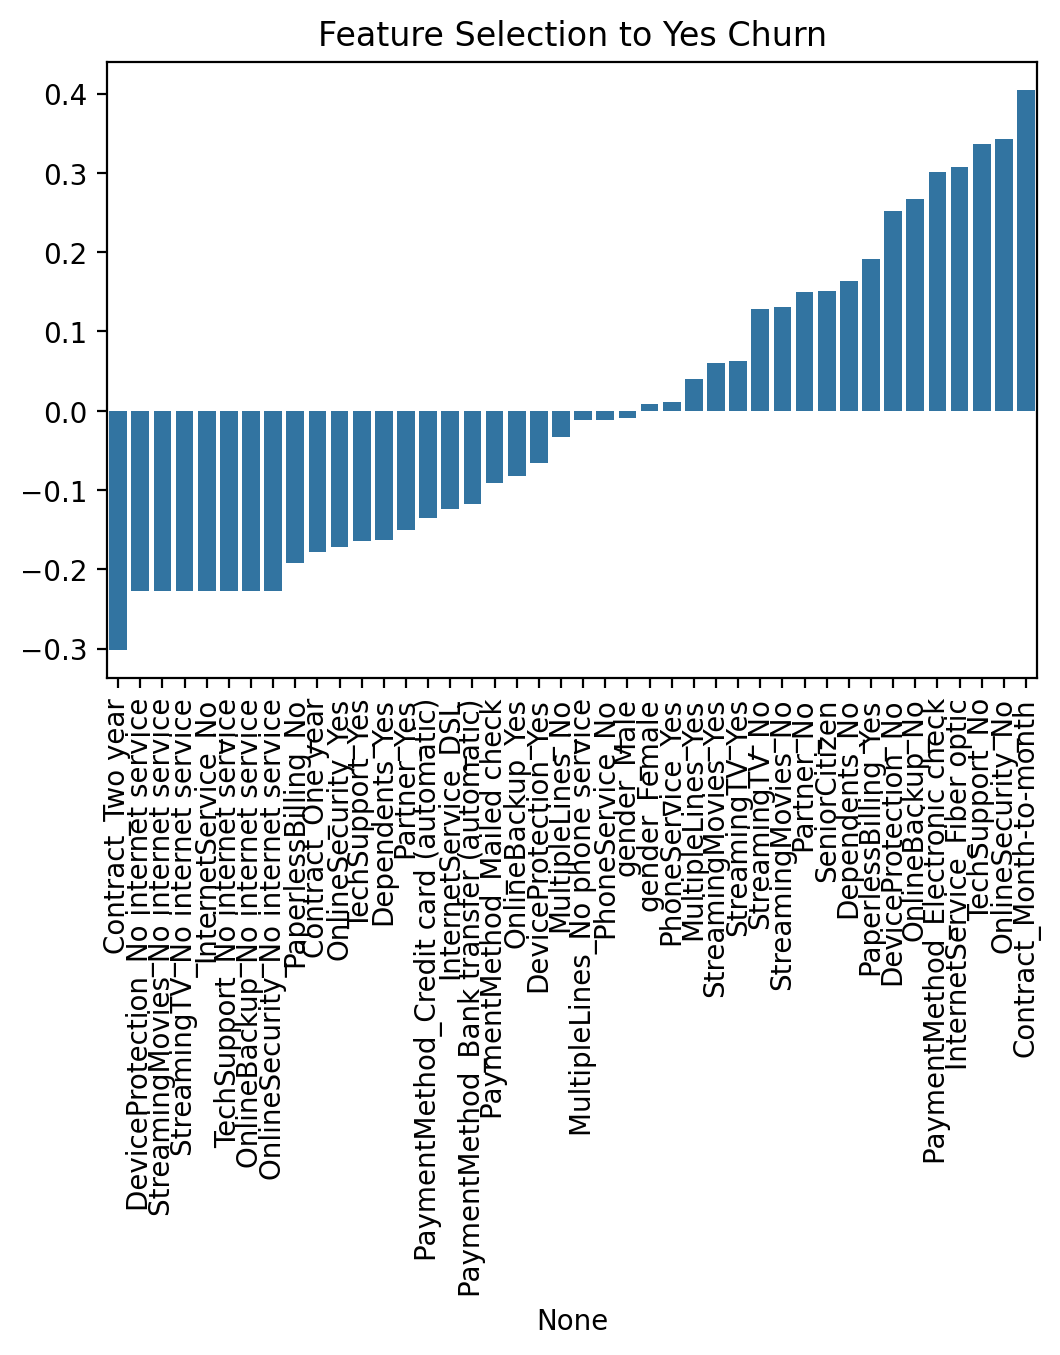

In [20]:
plt.figure(figsize=(6,4),dpi=200)
sns.barplot(x=new_df['Churn_Yes'].sort_values().iloc[1:-1].index,y=new_df['Churn_Yes'].sort_values().iloc[1:-1].values)
plt.title('Feature Selection to Yes Churn')
plt.xticks(rotation=90);

In [21]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [22]:
df['tenure']

0        1
1       34
2        2
3       45
4        2
        ..
7027    24
7028    72
7029    11
7030     4
7031    66
Name: tenure, Length: 7032, dtype: int64

<Axes: xlabel='tenure', ylabel='Count'>

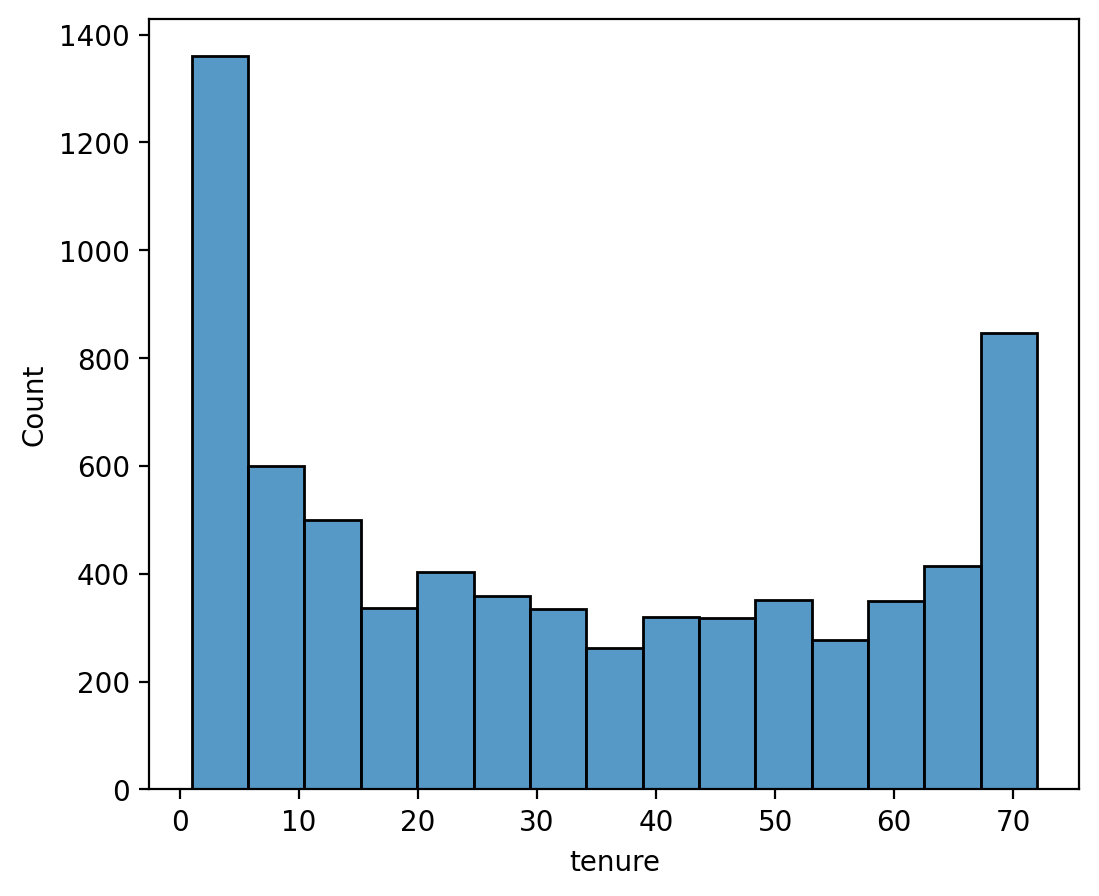

In [23]:
plt.figure(figsize=(6,5),dpi=200)
sns.histplot(data=df,x='tenure')

In [24]:
features = ['tenure','Churn','Contract']

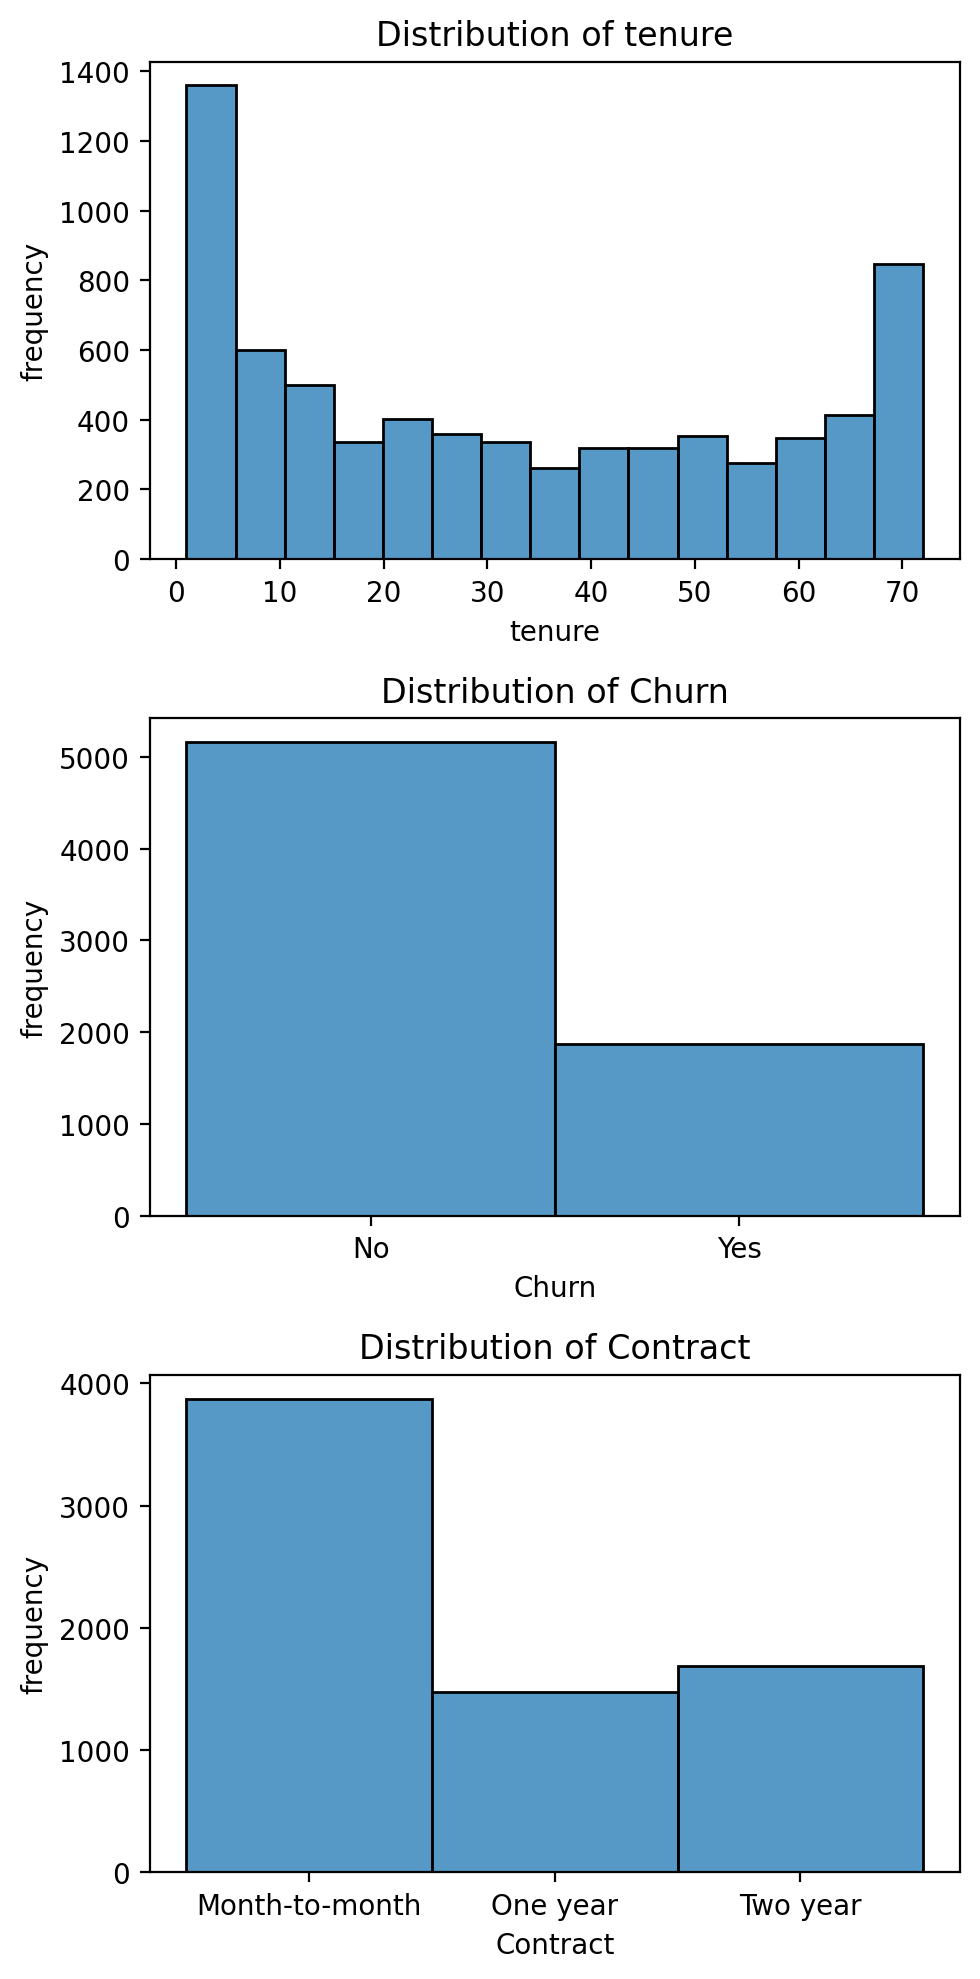

In [25]:
fig , axes = plt.subplots(len(features),1,figsize=(5,10),dpi=200)
for i , feature in enumerate(features):
    sns.histplot(data=df,x=feature,ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('frequency')

    plt.tight_layout()

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

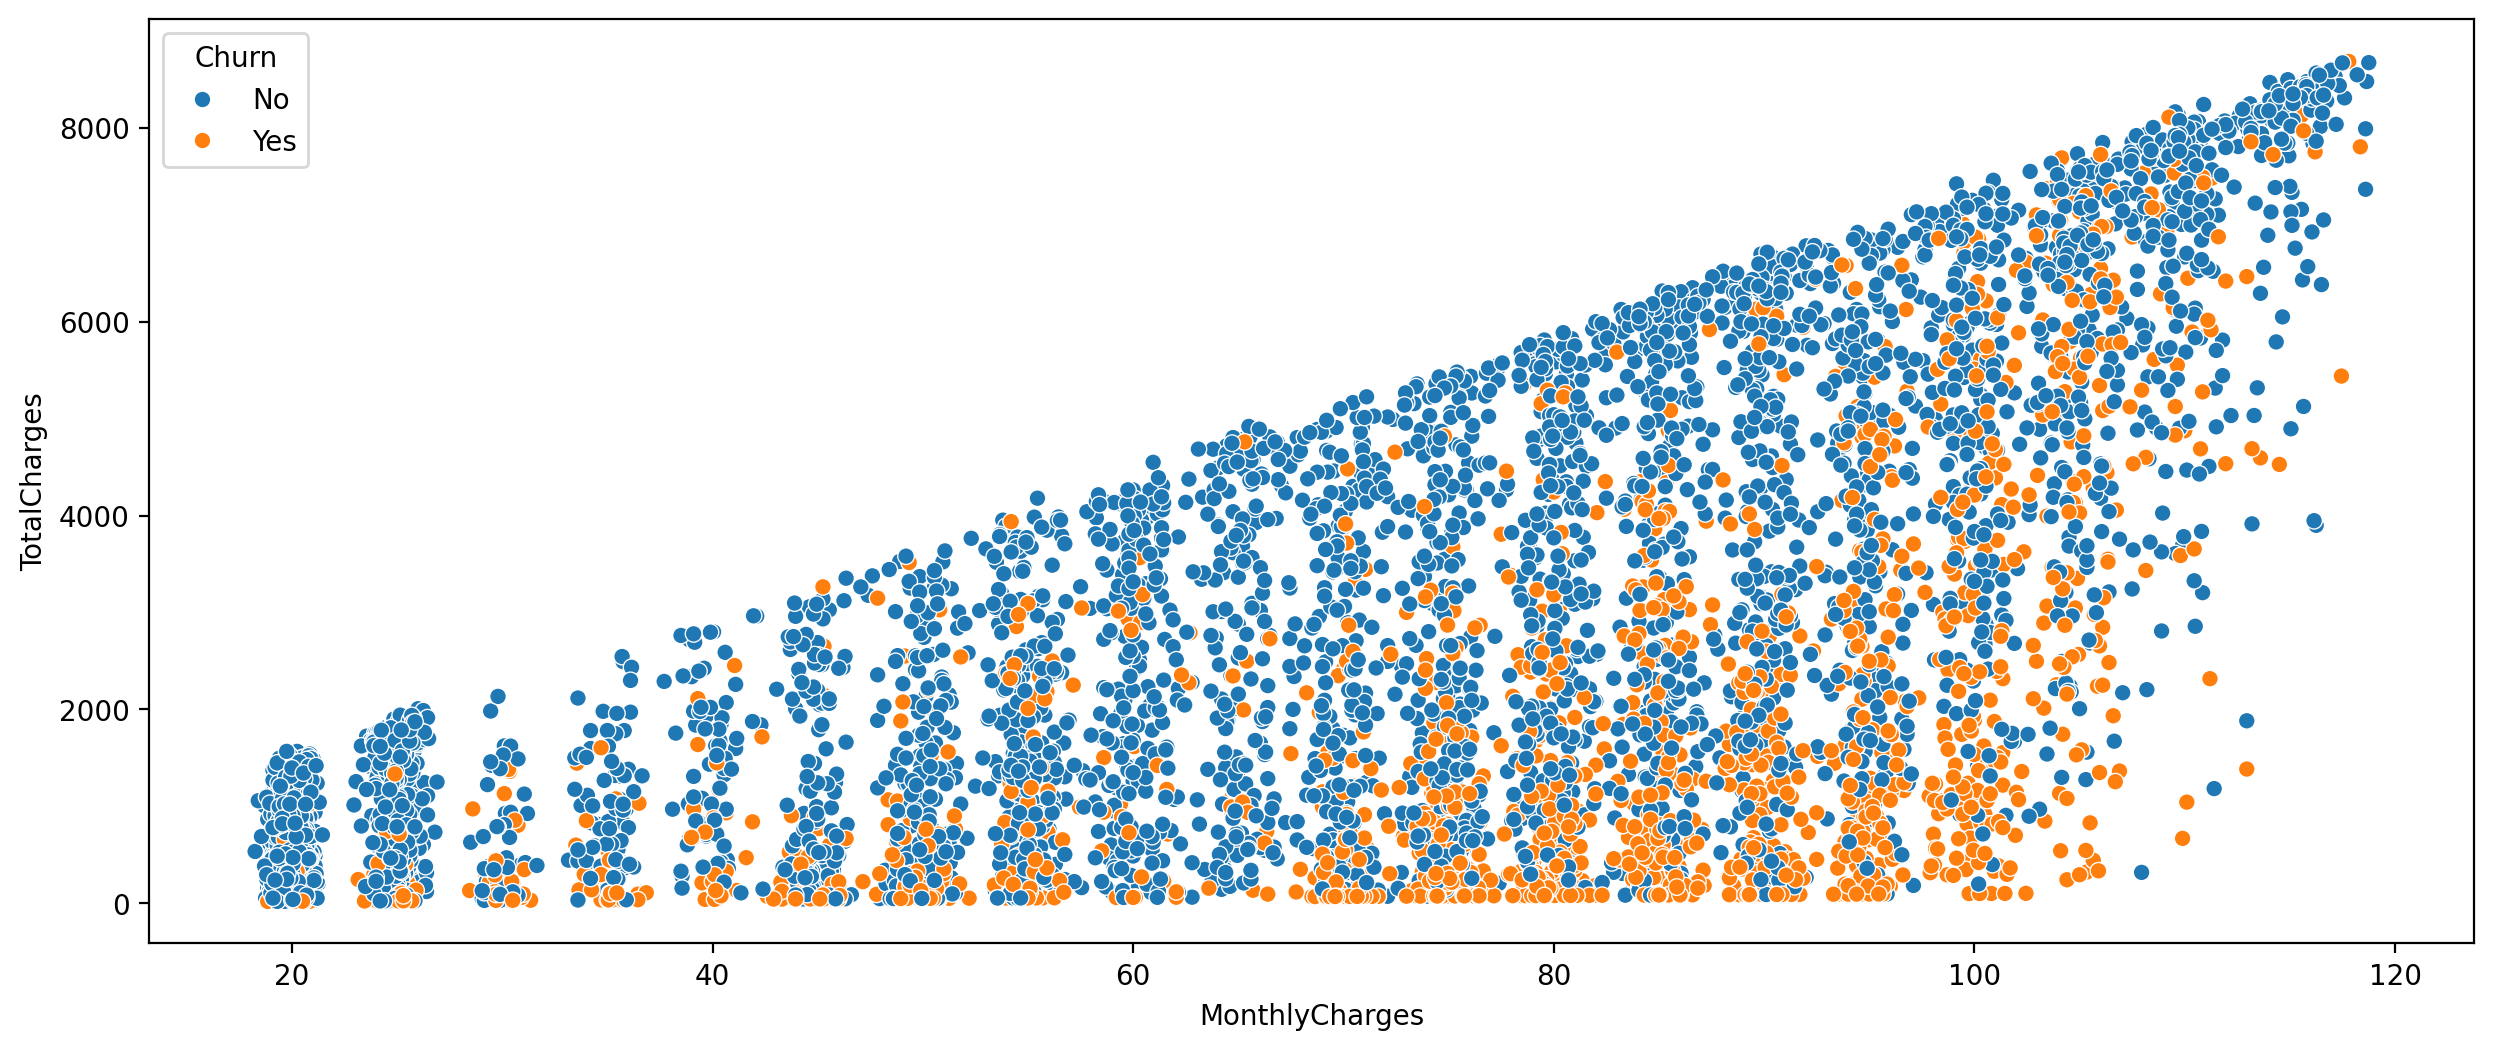

In [26]:
plt.figure(figsize=(15,6),dpi=200)
sns.scatterplot(data=df,y='TotalCharges',x='MonthlyCharges',hue='Churn')

In [27]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [28]:
df[(df['tenure'] == 2) & (df['Churn'] == 'Yes')]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
47,7760-OYPDY,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,80.65,144.15,Yes
134,2372-HWUHI,Male,0,No,No,2,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Electronic check,44.35,81.25,Yes
171,1875-QIVME,Female,0,Yes,No,2,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.40,242.80,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6613,4662-EKDPQ,Male,0,No,No,2,Yes,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,No,Bank transfer (automatic),62.05,118.30,Yes
6677,5561-NWEVX,Female,1,Yes,No,2,Yes,Yes,Fiber optic,No,...,Yes,No,No,No,Month-to-month,No,Electronic check,79.20,172.85,Yes
6693,2737-WFVYW,Female,0,No,No,2,No,No phone service,DSL,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,45.25,85.50,Yes
6716,0685-MLYYM,Female,1,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,No,Electronic check,70.75,154.85,Yes


In [29]:
len(df[(df['tenure'] == 1) & (df['Churn'] == 'Yes')])

380

In [30]:
((len(df[(df['tenure'] == 1) & (df['Churn'] == 'Yes')]))/(len(df[df['tenure'] == 1])))*100

61.99021207177814

In [31]:
df['tenure'].nunique()

72

In [32]:
yes_churn = df.groupby(['Churn','tenure']).count().transpose()['Yes']

In [33]:
no_churn = df.groupby(['Churn','tenure']).count().transpose()['No']

In [34]:
yes_churn

tenure,1,2,3,4,5,6,7,8,9,10,...,63,64,65,66,67,68,69,70,71,72
customerID,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
gender,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
SeniorCitizen,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
Partner,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
Dependents,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
PhoneService,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
MultipleLines,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
InternetService,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
OnlineSecurity,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
OnlineBackup,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6


In [35]:
no_churn

tenure,1,2,3,4,5,6,7,8,9,10,...,63,64,65,66,67,68,69,70,71,72
customerID,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
gender,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
SeniorCitizen,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
Partner,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
Dependents,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
PhoneService,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
MultipleLines,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
InternetService,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
OnlineSecurity,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
OnlineBackup,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356


In [36]:
yes_churn = yes_churn.transpose()

In [37]:
no_churn = no_churn.transpose()

In [38]:
yes_churn

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
tenure,,,,,,,,,,,,,,,,,,,
1,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380
2,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123
3,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94
4,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83
5,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
69,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
70,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11


In [39]:
no_churn

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
tenure,,,,,,,,,,,,,,,,,,,
1,233,233,233,233,233,233,233,233,233,233,233,233,233,233,233,233,233,233,233
2,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115
3,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106
4,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93
5,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91
69,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87
70,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108


In [40]:
yes_churn['churn_rate'] = (yes_churn['customerID'] / (yes_churn['customerID'] + no_churn['customerID'])) * 100

In [41]:
yes_churn['churn_rate']

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: churn_rate, Length: 72, dtype: float64

<Axes: xlabel='tenure'>

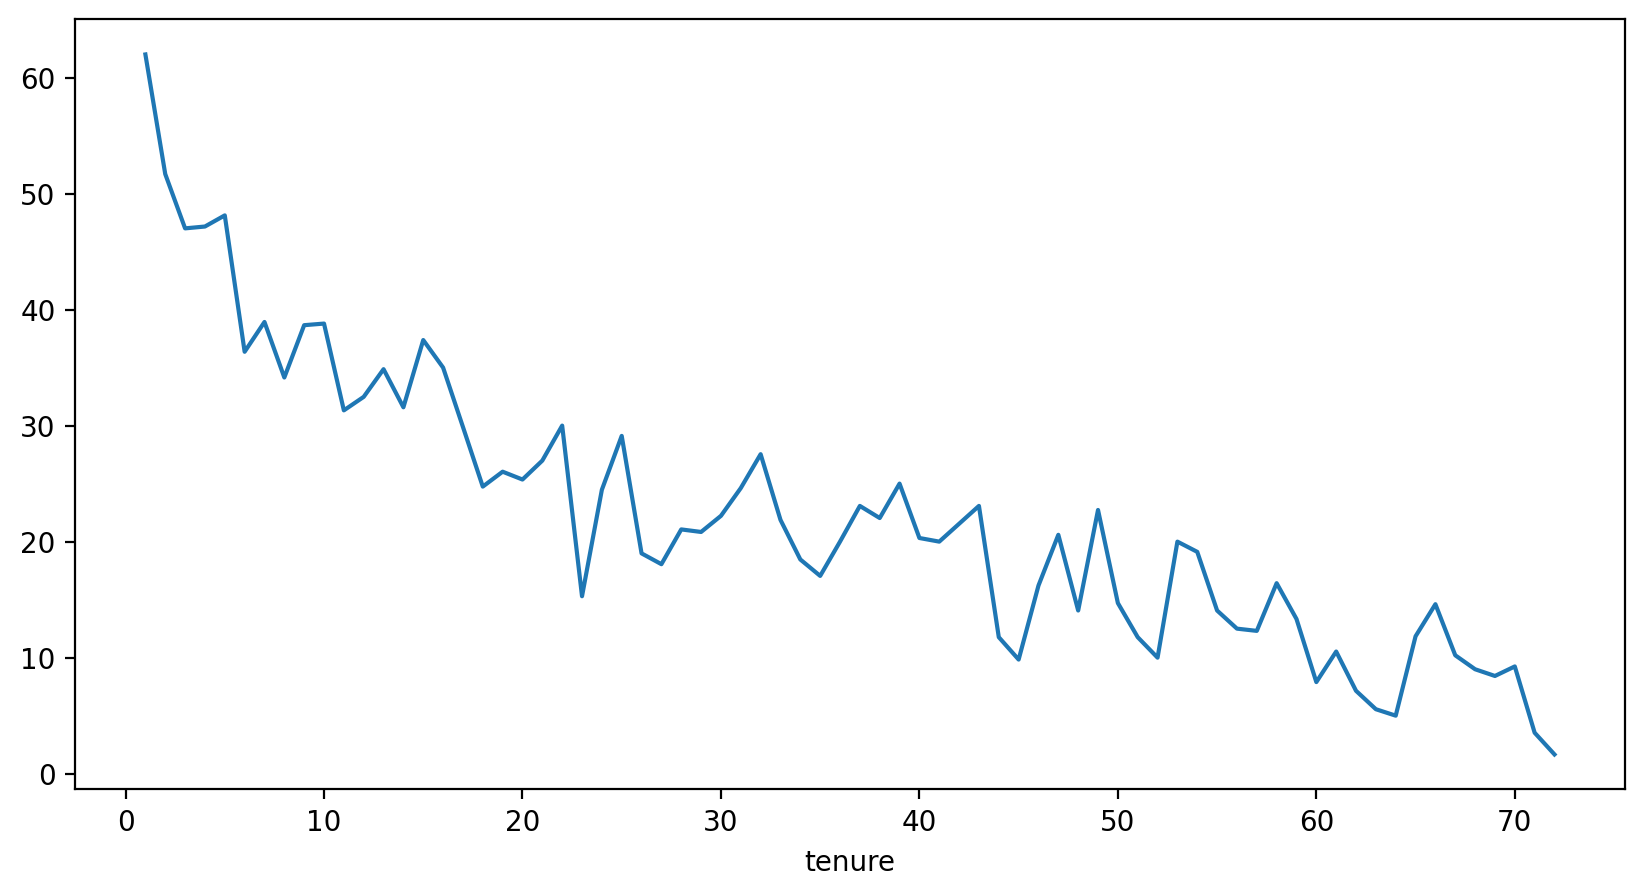

In [42]:
plt.figure(figsize=(10,5),dpi=200)
yes_churn['churn_rate'].plot()
#plt.ylabel('Churn_percent')
#plt.xlabel('tenure')

In [43]:
def tc(tenure):
    if tenure <= 12:
        return '0-12 months'
    elif tenure > 12 and tenure <= 24:
        return '12-24 months'
    elif tenure > 24 and tenure <= 48:
        return '24-48 months'
    else:
        return 'Over 48 months'

In [44]:
df['Tenure_Cohort'] = df['tenure'].apply(tc)

In [45]:
df.head(10)[['tenure','Tenure_Cohort']]

,tenure,Tenure_Cohort
0,1,0-12 months
1,34,24-48 months
2,2,0-12 months
3,45,24-48 months
4,2,0-12 months
5,8,0-12 months
6,22,12-24 months
7,10,0-12 months
8,28,24-48 months
9,62,Over 48 months


<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

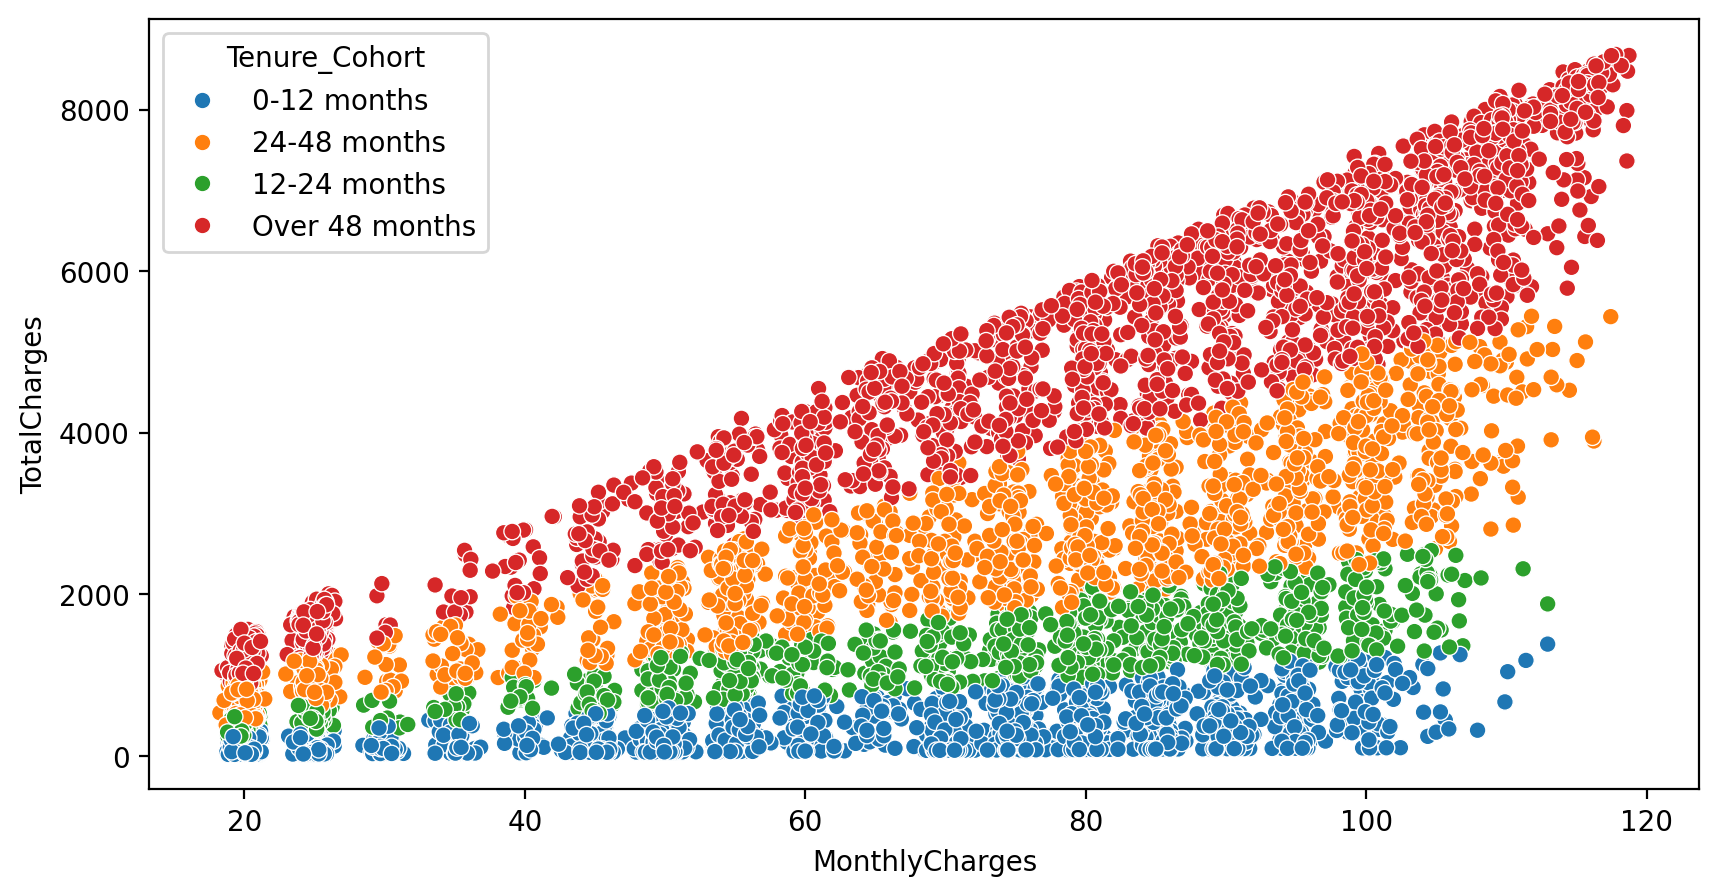

In [46]:
plt.figure(figsize=(10,5),dpi=200)
sns.scatterplot(data=df,y='TotalCharges',x='MonthlyCharges',hue='Tenure_Cohort')

<Axes: xlabel='Tenure_Cohort', ylabel='count'>

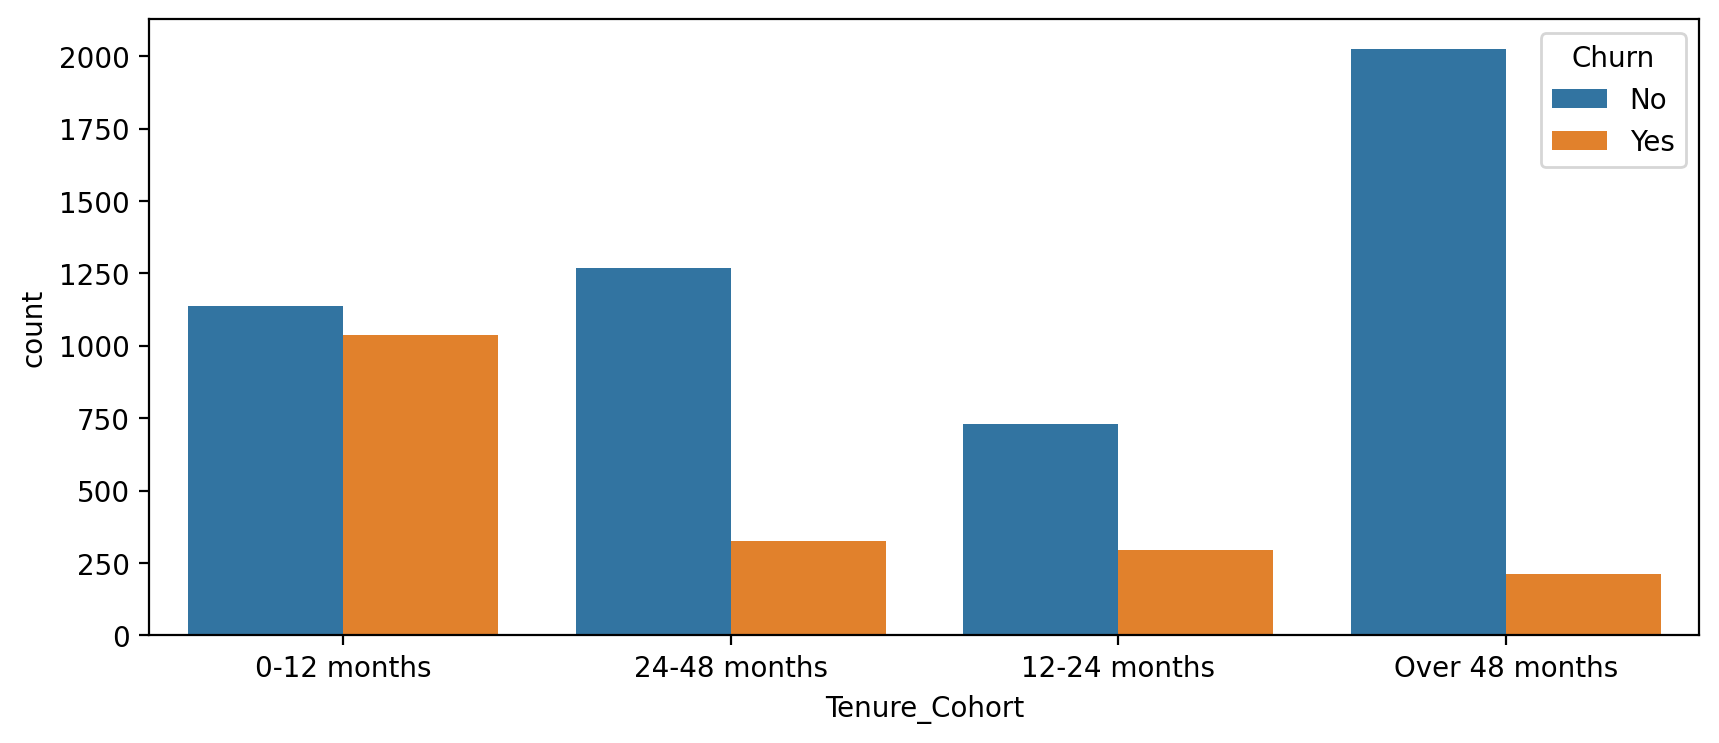

In [47]:
plt.figure(figsize=(10,4),dpi=200)
sns.countplot(data=df,x='Tenure_Cohort',hue='Churn')

<Figure size 2000x800 with 0 Axes>

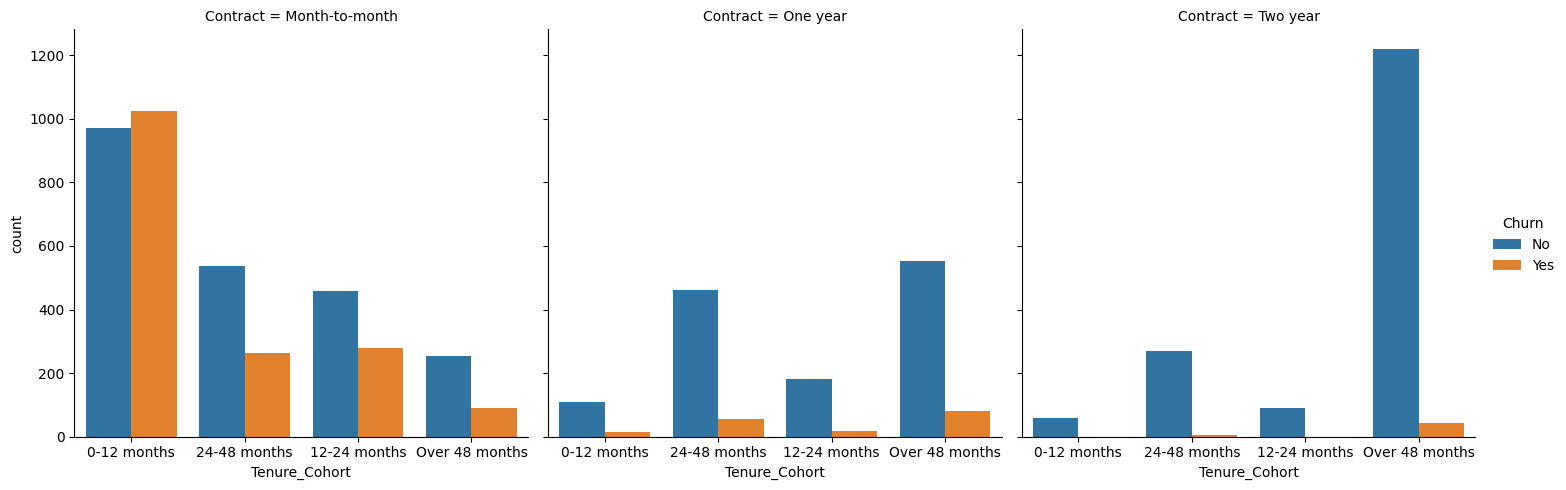

In [48]:
plt.figure(figsize=(10,4),dpi=200)
sns.catplot(data=df,x='Tenure_Cohort',hue='Churn',col='Contract',kind='count')

In [49]:

le = LabelEncoder()

In [50]:
encoded_df = df.copy()

In [51]:
encoded_df = encoded_df.drop('customerID',axis=1)

In [52]:
for column in encoded_df.columns:
    encoded_df[column] = le.fit_transform(encoded_df[column])

In [53]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure_Cohort
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0-12 months
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,24-48 months
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0-12 months
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,24-48 months
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0-12 months


In [54]:
encoded_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure_Cohort
0,0,0,1,0,0,0,1,0,0,2,...,0,0,0,0,1,2,142,74,0,0
1,1,0,0,0,33,1,0,0,2,0,...,0,0,0,1,0,3,497,3624,0,2
2,1,0,0,0,1,1,0,0,2,2,...,0,0,0,0,1,3,435,536,1,0
3,1,0,0,0,44,0,1,0,2,0,...,2,0,0,1,0,0,266,3570,0,2
4,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,1,2,728,674,1,0


In [55]:
X = encoded_df.drop('Churn',axis=1)
y = encoded_df['Churn']

In [56]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [58]:
from sklearn.preprocessing import StandardScaler

In [59]:
scaler_ = StandardScaler()

In [60]:
Xtrain_scaled = scaler_.fit_transform(X_train)

In [61]:
Xtest_scaled = scaler_.transform(X_test)

In [62]:
from sklearn.linear_model import LinearRegression

In [63]:
lr_m = LinearRegression()

In [64]:
lr_m.fit(Xtrain_scaled,y_train)

LinearRegression()

In [65]:
y_pred = lr_m.predict(Xtest_scaled)

In [66]:
from sklearn.metrics import mean_squared_error,r2_score

In [67]:
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

In [68]:
print(mse)

0.13663785341280377


In [69]:
print(r2)

0.2735545889907527


In [70]:
#logistic regression

In [71]:
from sklearn.linear_model import LogisticRegression

In [72]:
from sklearn.preprocessing import StandardScaler

In [73]:
scaler = StandardScaler()

In [74]:
nenc_df = df.copy()

In [75]:
X = nenc_df.drop(['Churn','customerID'],axis=1)
y = nenc_df['Churn']

In [76]:
encoder = LabelEncoder()

In [77]:
for column in X.columns:
    X[column] = encoder.fit_transform(X[column])

In [78]:
logr_m = LogisticRegression(max_iter=500,solver='saga')

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [80]:
X_train_scaled = scaler.fit_transform(X_train)

In [81]:
X_test_scaled = scaler.transform(X_test)

In [82]:
logr_m.fit(X_train_scaled,y_train)

LogisticRegression(max_iter=500, solver='saga')

In [83]:
y2_pred = logr_m.predict(X_test_scaled)

In [84]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [85]:
acc_sc = accuracy_score(y_test,y2_pred)

In [86]:
conf_mat = confusion_matrix(y_test,y2_pred)

In [87]:
class_rep = classification_report(y_test,y2_pred)

In [88]:
print(acc_sc)

0.8113744075829384


In [89]:
print(conf_mat)

[[1434  146]
 [ 252  278]]


In [90]:
#plot_confusion_matrix(logr_m,X_test,y_test)

In [91]:
print(class_rep)

              precision    recall  f1-score   support

          No       0.85      0.91      0.88      1580
         Yes       0.66      0.52      0.58       530

    accuracy                           0.81      2110
   macro avg       0.75      0.72      0.73      2110
weighted avg       0.80      0.81      0.80      2110



In [ ]:
#SVC

In [93]:
from sklearn.svm import SVC

In [100]:
svc_m = SVC(kernel='rbf',C=1,gamma='scale')

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [98]:
Xs_train = scaler.fit_transform(X_train)

In [99]:
Xs_test = scaler.transform(X_test)

In [101]:
svc_m.fit(Xs_train,y_train)

SVC(C=1)

In [103]:
ypred = svc_m.predict(Xs_test)

In [104]:
acc = accuracy_score(y_test,ypred)

In [105]:
con_m = confusion_matrix(y_test,ypred)

In [106]:
cl_r = classification_report(y_test,ypred)

In [107]:
print(acc)

0.8104265402843602


In [108]:
print(con_m)

[[1454  126]
 [ 274  256]]


In [ ]:
plot_confusion_matrix()

In [109]:
print(cl_r)

              precision    recall  f1-score   support

          No       0.84      0.92      0.88      1580
         Yes       0.67      0.48      0.56       530

    accuracy                           0.81      2110
   macro avg       0.76      0.70      0.72      2110
weighted avg       0.80      0.81      0.80      2110

